In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('listings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45533 non-null  int64  
 1   name                            45532 non-null  object 
 2   host_id                         45533 non-null  int64  
 3   host_name                       45531 non-null  object 
 4   neighbourhood_group             45533 non-null  object 
 5   neighbourhood                   45533 non-null  object 
 6   latitude                        45533 non-null  float64
 7   longitude                       45533 non-null  float64
 8   room_type                       45533 non-null  object 
 9   price                           37296 non-null  float64
 10  minimum_nights                  45533 non-null  int64  
 11  number_of_reviews               45533 non-null  int64  
 12  last_review                     

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,City of Los Angeles,Beverlywood,34.048410,-118.387510,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
1,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,Other Cities,Beverly Hills,34.070583,-118.390742,Entire home/apt,434.0,30,0,NaN,NaN,4,267,0,NaN
2,1211025880050828732,Modern Hollywood Hills house,68445028,John,Other Cities,Beverly Hills,34.065140,-118.375820,Entire home/apt,319.0,1,0,NaN,NaN,25,365,0,NaN
3,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,Other Cities,Santa Monica,34.015590,-118.494080,Entire home/apt,231.0,5,44,2024-07-21,3.41,3,193,38,Exempt
4,5694422,2 Bedroom Modern Oasis,4151836,Sara,City of Los Angeles,Del Rey,33.990170,-118.422520,Entire home/apt,110.0,30,368,2023-05-04,3.21,2,117,0,HSR19-004352


In [5]:
df.shape

(45533, 18)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.553300e+04,4.553300e+04,45533.000000,45533.000000,37296.000000,45533.000000,45533.000000,33387.000000,45533.000000,45533.000000,45533.000000
mean,5.208941e+17,1.950473e+08,34.055308,-118.312743,289.377762,17.858520,36.658929,1.458020,18.604155,195.093449,8.459864
std,4.976570e+17,1.899825e+08,0.141394,0.172210,715.366985,28.836101,80.548528,1.719427,66.312446,133.394403,16.361008
min,1.090000e+02,5.210000e+02,33.338360,-118.917134,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.319485e+07,2.632699e+07,33.998590,-118.413090,98.000000,2.000000,0.000000,0.220000,1.000000,75.000000,0.000000
50%,6.363561e+17,1.165631e+08,34.060625,-118.343391,155.000000,14.000000,6.000000,0.790000,2.000000,202.000000,1.000000
75%,1.006571e+18,3.712316e+08,34.108160,-118.233737,260.000000,30.000000,34.000000,2.230000,9.000000,335.000000,9.000000
max,1.238217e+18,5.997497e+08,34.811183,-117.653352,56425.000000,1124.000000,3024.000000,55.490000,569.000000,365.000000,543.000000


In [7]:
df.isnull().sum()

id                                    0
name                                  1
host_id                               0
host_name                             2
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              8237
minimum_nights                        0
number_of_reviews                     0
last_review                       12146
reviews_per_month                 12146
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           32730
dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['last_review', 'host_name', 'number_of_reviews_ltm', 'license','name'], axis=1, inplace=True)

In [10]:
df['reviews_per_month'].fillna(0, inplace=True)
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda x: np.round(x) if x > 0 else 0)

In [11]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [12]:
df.shape

(45533, 13)

In [13]:
df_subset = df[['price', 'neighbourhood']]
df_subset.head(5)

,price,neighbourhood
0,NaN,Beverlywood
1,434.0,Beverly Hills
2,319.0,Beverly Hills
3,231.0,Santa Monica
4,110.0,Del Rey


In [14]:
df_subset.isnull().sum()

price            8237
neighbourhood       0
dtype: int64

In [15]:
df_subset = df_subset[df_subset['price'].notna()]

In [16]:
import scipy.stats as stats

f_stat, p_value = stats.f_oneway(*(df_subset[df_subset['neighbourhood'] == neighbourhood]['price'].dropna() for neighbourhood in df_subset['neighbourhood'].unique()))

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

ANOVA F-statistic: 21.669949284742607
ANOVA p-value: 0.0


In [17]:
df['price'] = df.groupby('neighbourhood')['price'].transform(lambda x: x.fillna(x.mean()))

In [18]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             1
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<ipython-input-19-e9c222b32ca6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall')


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

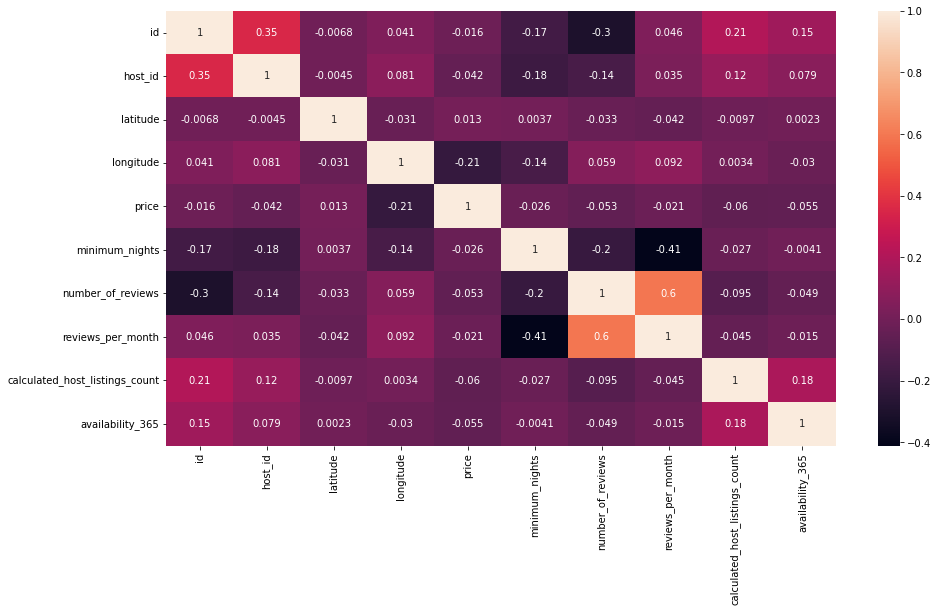

In [19]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

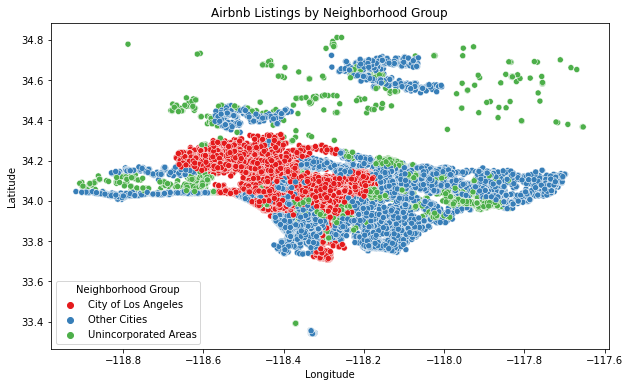

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='Set1')
plt.title('Airbnb Listings by Neighborhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighborhood Group')
plt.show()


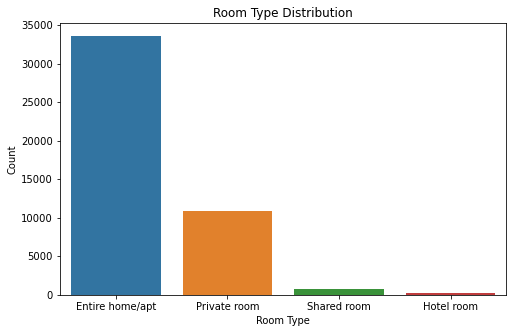

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()



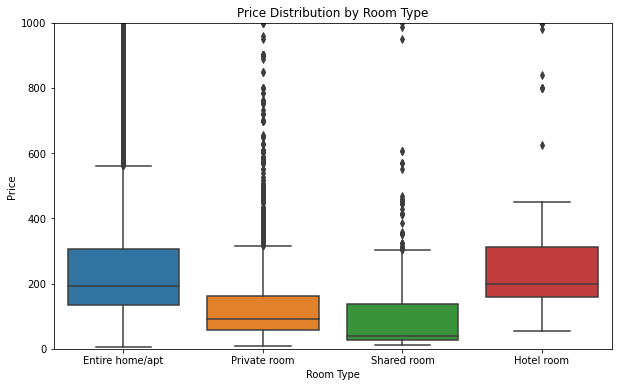

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Optional: Set a limit if there are outliers skewing the scale
plt.show()


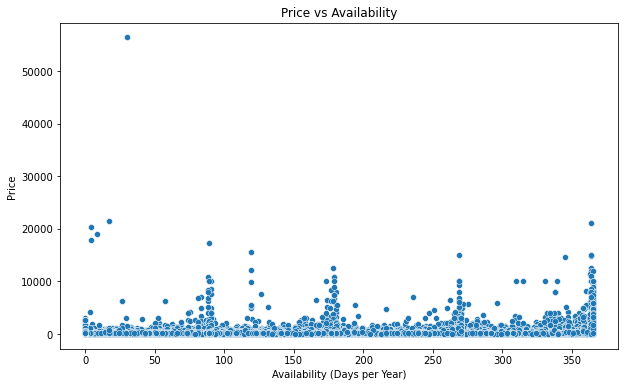

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='availability_365', y='price', data=df)
plt.title('Price vs Availability')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price')
plt.show()
